# 多腕バンデッド問題_確率が変わらない場合

# 皆様のプログラムの列挙

In [1]:
#例外的扱い
class MaxStrategy:
    ''' ランダムにスロットマシンを引く戦略
    '''
    def __init__(self, m):
        self.mab = m;
    def learn(self,k, result):
        return

    def choice(self):
        return (self.mab).getmaxind()

    def reset(self):
        return

In [2]:
#1
class TsuikiStrategy_A:
    ''' 前のが当たったらそれを引く戦略
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
    def learn(self, k, result):
        if (result == 1):
            self.my = self.my;
        else:
            self.my = (self.my + 1)% MultiArmedBandit.NUM

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [3]:
#2
class RandomStrategy_A:
    ''' ランダムにスロットマシンを引く戦略
    '''
    def learn(self,k, result):
        return

    def choice(self):
        return random.randrange(MultiArmedBandit.NUM);

    def reset(self):
        return

In [4]:
#3
class ConstantStrategy_A:
    def learn(self,k, result):
        return

    def choice(self):
        return 0

    def reset(self):
        return

In [5]:
#4
class NakasoneStrategy_A:
    def __init__(self):
        self.count = 0
        self.bandit =[]
        self.times = 12
        for _ in range(3):
            self.bandit.append(0)
    
    def learn(self, k, result):
        self.count += 1
        for n in range(3):
            if n == k and result == 1:
                self.bandit[n] += 1

    def choice(self):
        if self.count <= self.times:
            self.number = self.count%3
        if self.count > self.times:
            self.number = self.bandit.index(max(self.bandit))
        return self.number
    
    def reset(self):
        self.count = 0
        self.bandit = []
        self.times = 12
        for _ in range(3):
            self.bandit.append(0)

In [6]:
#5
class YoshinoStrategy_A:
    ''' 前のが当たったらそれは次は当たらないと考え、それ以外からひく戦略　外れたら同じのを引く。
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
    def learn(self, k, result):
        if (result == 1):
            self.my != self.my
        else:
            self.my = self.my
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [7]:
#6
class FujiwaraStrategy_A:
    ''' 自分のstrategy
    3回連続ではずれを引いたなら次に行く.
    ただし初回に引くときは2回連続ではずれを引いたことになっている.
    '''
    def __init__(self):
        self.my = 0
        self.past1 = 0
        self.past2 = 0

    def learn(self,k, result):
        if(result==0 and self.past1==0  and self.past2==0):
            self.my = (self.my+1) % MultiArmedBandit.NUM
        self.past2 = self.past1
        self.past1 = result
        return

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.past1 = 0
        self.past2 = 0
        return

In [8]:
#7
class NishioStrategy_A:
    ''' 3回連続で外れる、または外れ2回当たり1回外れ2回が起こるまでまで引く戦略
    インスタンス変数:
        my : 次に引く手
        count : 同じ台で連続で外した回数
        count2 : 2回連続で外した回数（当たりが2回連続した場合0回になる）
    '''

    def __init__(self):
        self.my = 0
        self.count = 0
        self.count2 = 0
    def learn(self, k, result):
        if (result == 1):
            self.my = self.my;
            if(self.count == 0):
                self.count2 = 0
            self.count = 0
        else:
            self.count += 1
            if(self.count == 2):
                self.count2 += 1
            if((self.count2 == 2) or (self.count == 3)):
                self.count = 0
                self.count2 = 0
                self.my = (self.my + 1)% MultiArmedBandit.NUM

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.count = 0
        self.count2 = 0

In [9]:
#8
import math
#TAがsigmoid関数をclassの内側に入れた。
"""def sigmoid(x,a):
    return 1/(1+math.exp(-a*x))"""

class OhgaStrategy_A:
    def __init__(self):
        self.member=[0,1,2] #選択されうるスロット
        self.membercount=[0]*3 #スロット別当たりを引いた回数
        self.count=0 #除外の周期
        self.nowcount=0 #現在の引いた回数
    
    def sigmoid(self,x,a):
        return 1/(1+math.exp(-a*x))
        
    def learn(self,k,result):
        self.ind=self.member.index(k)
        self.membercount[self.ind]+=result
        if self.count%len(self.member)==0:
            #最大の当たり回数と最小の当たり回数の差が閾値以上だった時に、最小のスロットを除外する
            #色々パラメータを試したが、一次関数よりシグモイド関数のほうが結果が良かった。
            if max(self.membercount)-min(self.membercount)>2*(1-self.sigmoid(-1+2*self.nowcount/100,1))and len(self.member)>1:
                self.ind=self.membercount.index(min(self.membercount))
                del self.member[self.ind]
                del self.membercount[self.ind]
                self.count=0
    def choice(self):
        self.count+=1
        self.nowcount+=1
        return self.member[self.count%len(self.member)]
    def reset(self):
        self.member=[0,1,2]
        self.membercount=[0]*3
        self.count=0
        self.nowcount=0

In [10]:
#9
#引いた回数がlearnから与えられるかのようなプログラムになっていた。
#これではエラーなので、TAが引いた回数を表す変数iを導入した。

"""class KoikeAtuyaStrategy:
    ''' 最初の30回で一番pが大きいスロットマシンを推定する
    確率が変動しないスロットマシン用
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
        self.acc=[0,0,0]
    def learn(self,i,k,result):
        if i<=9:
            self.my=0
            if result==1:
                self.acc[0]+=1
            else:
                self.acc[0]+=-1
        if i<=19 and i>=10:
            self.my=1
            if result==1:
                self.acc[1]+=1
            else:
                self.acc[1]+=-1
        if i<=29 and i>=20:
            self.my=2
            if result==1:
                self.acc[2]+=1
            else:
                self.acc[2]+=-1
        else:
            self.my=self.acc.index(max(self.acc))#一番当たったスロットマシンを引き続ける

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0"""

class KoikeStrategy_A:
    ''' 最初の30回で一番pが大きいスロットマシンを推定する
    確率が変動しないスロットマシン用
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
        self.acc=[0,0,0]
        self.i=0
    def learn(self,k,result):##############問題あり
        self.i+=1
        if self.i<=9:
            self.my=0
            if result==1:
                self.acc[0]+=1
            else:
                self.acc[0]+=-1
        if self.i<=19 and self.i>=10:
            self.my=1
            if result==1:
                self.acc[1]+=1
            else:
                self.acc[1]+=-1
        if self.i<=29 and self.i>=20:
            self.my=2
            if result==1:
                self.acc[2]+=1
            else:
                self.acc[2]+=-1
        else:
            self.my=self.acc.index(max(self.acc))#一番当たったスロットマシンを引き続ける
            
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.i = 0

In [11]:
#10
class MotonishiStrategy_A:
    "変化しないとき用"
    def __init__(self):
        self.my = 0
        self.con = []
    def learn(self, k, result):
        self.con.append(result)
        if (len(self.con)==6):
            del self.con[0]
        if (self.con == [0])or(self.con==[1,0])or(self.con==[1,1,0,0])or(self.con.count(0)==3):
            self.my = (self.my +1)%MultiArmedBandit.NUM
            self.con = []
        else:
            self.my = self.my

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.con = []

In [12]:
#11
class MatsumotoStrategy_A:
    """
    初めに、全てのスロットマシンで、それぞれ100回ずつ引く。
    残りの回数は、それまで引いた中で最も当たり確率が高かったマシンを
    選んで引く。
    """
    def __init__(self):
        self.total = 0
        self.total_list = [0 for _ in range(MultiArmedBandit.NUM)]
        self.cnt_list = [0 for _ in range(MultiArmedBandit.NUM)]
        self.p_list = [0 for _ in range(MultiArmedBandit.NUM)]
        self.my = 0

    def learn(self, k, result):
        self.total += 1

        self.total_list[k] += 1
        if result == 1:
            self.cnt_list[k] += 1
            self.p_list[k] = self.cnt_list[k] / self.total_list[k]

        if self.total // MultiArmedBandit.NUM < 100:
            self.my = self.total % MultiArmedBandit.NUM
        else:
            self.my = self.p_list.index(max(self.p_list))

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [13]:
#12
class HigoStrategy_A:
    '''高確率である限り同じスロットを引く戦略
    インスタンス変数：
        my:次に引く手
        count:連続で引いた回数
        atari:連続で引いているときに当たった回数'''
    def __init__(self):
        self.my=0
        self.count=0
        self.atari=0
    def learn(self,k,result):
        self.count+=1
        if(result==1):
            self.atari+=1
        
        if(self.atari/self.count>0.599):
            self.my=self.my
        else:
            self.count=0
            self.atari=0
            self.my=(self.my+1)%MultiArmedBandit.NUM
    def choice(self):
        return self.my
    def reset(self):
        self.my=0
        self.count=0
        self.atari=0

In [14]:
#13
import numpy as np
class NishiokaStrategy_A:
    #当たった割合だけそれを引く確率をあげる。
    def __init__(self):
        self.l = [[] for _ in range(3)] #当たりはずれをすべて記録するリスト。
        self.p_list = [0, 0, 0] #当たりの割合を記録するリスト。
        self.p_standard = [1/3, 1/3, 1/3] #self.p_listを規格化したもの。

    def learn(self, k, result):
        self.l[k].append(result)
        for i in range(3):
            if len(self.l[i]) == 0:
                self.p_list[i] = 1 #確率が0にならないように初期値は1にしておく。
            else:
                self.p_list[i] = 1 + 2 * sum(self.l[i]) / len(self.l[i])
        for i in range(3):
            self.p_standard[i] = self.p_list[i] / sum(self.p_list)

    def choice(self):
        a = random.uniform(0, 1)
        if 0 <= a < self.p_standard[0]:
            return 0
        if self.p_standard[0] <= a < 1 - self.p_standard[2]:
            return 1
        if 1- self.p_standard[2] <= a <= 1:
            return 2
            
    def reset(self):
        return

In [15]:
#14
import numpy as np

class NakahashiStrategy_A:
    ''' 最初の20回で見定めて残り80回は同じものを引く
    '''
    def __init__(self):
        self.my = 0
        self.total = [0,0,0]
        self.hit = [0,0,0]

    def learn(self, k, result):
        if sum(self.total) <= 20:                # 初回の20回は
            if result == 1:
                self.hit[k] += 1                 # 当たりの数を記憶して
            else:
                pass
            self.total[k] += 1

            if (self.total[k] % 2 == 0):
                if (self.hit[k] % 2 == 0) and (self.hit[k] > 0):          # 直近2回ともが当たりだったら
                    self.my = self.my                                     # また同じ番号のスロットを引く
                else:                                                     # そうでない場合は
                    self.my = (self.my + 1)% MultiArmedBandit.NUM         # 次の番号のスロットへ
            else:
                self.my = self.my
        
        else:
            self.my = np.argmax(self.hit)        # 21回目以降からは20回までで一番当たりの多い番号のスロットを引き続ける

    def choice(self):
        return self.my       

    def reset(self):
        self.my = 0

In [16]:
#15
class YoshimuraStrategy_A:
    ''' 前のが当たったらそれを引く戦略
    インスタンス変数:
        my : 次に引く手
    '''
    def __init__(self):
        self.my = 0
        self.number = [5]*3 #各スロットを引いた回数 初期値は5
        self.hitnum = [6]*3 #各スロットで当たりを引いた回数 初期値は6
        self.currentmean = [5/6]*3
        self.count = 0
        self.currentmax = 0
        
    def learn(self, k, result):
        #初めの3回で各スロットを1回ずつ引く
        if (self.count <= 3 - 1):
            self.my = self.count % 3
            self.number[self.my] += 1
            self.hitnum[self.my] += result
        else:
            self.number[self.my] += 1
            self.hitnum[self.my] += result
            #平均値更新
            pre_currentmean = self.currentmean[self.my]
            self.currentmean[self.my] = self.hitnum[self.my] / self.number[self.my]
            #currentmax更新
            max = 0
            for j in range(0, 3):
                if(max < self.currentmean[j]):
                    self.currentmax = j
                    max = self.currentmean[j]
            self.my = self.currentmax

        self.count += 1
        #確認用
        #print(f"count = {self.count}, number = {self.number}, hitnum = {self.hitnum}, mean = {self.currentmean}, max = {self.currentmax}")

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.number = [5]*3
        self.hitnum = [6]*3
        self.currentmean = [5/6]*3
        self.count = 0
        self.currentmax = 0

In [17]:
#16
#小規模修復不可能、10回ずつ引いて1番当たるものを引き続ける戦略との記載ありなのでそれに書き換え
"""class KitamuraStrategy:
    def __init__(self):
        self.my = 0
        self.i = 0
        self.atari = [0]*MultiArmedBandit.NUM
        m = MultiArmedBandit()
        
    def learn(self, k, result):
        for i in range(3):
            for j in range(30):
                result = m.slot(i%3)
                self.atari[i] += result
        self.my = self.atari.index(max(self.atari))
        
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0"""
        
class KitamuraStrategy_A:
    def __init__(self):
        self.my = 0
        self.i = 0
        self.atari = [0]*MultiArmedBandit.NUM
        
    def learn(self, k, result):
        self.i+=1
        self.atari[k]+=result
        
        if self.i<30:
            self.my = self.i%3
        else :
            self.my = self.atari.index(max(self.atari))
        
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.i = 0
        self.atari = [0]*MultiArmedBandit.NUM

In [18]:
#17
class KitaStrategy_A:
    def __init__(self):
        self.pros = [0,0,0]
        self.recent = 0
        self.loop = 0

    def learn(self,k, result):
        self.pros[k] += result
        self.loop += 1
        self.recent = k
        return

    def choice(self):
        if(self.loop/3 < 6):
            return (self.recent + 1) % 3
        else:
            return self.pros.index(max(self.pros))

    def reset(self):
        self.pros = [0,0,0]
        self.recent = 0
        self.loop = 0
        return

In [19]:
#18
#何が間違っていているかわからないがエラーになる。
"""class NozakiStrategy_A:

    import numpy as np
    A = np.array([100,100,100])
    B = np.array([100,100,100])

    def __init__(self):
        self.my = 2

    def learn(self,k,result):

        A[k] += 1

        if (result == 1):
            B[k] += 1
        else:
            B[k] += -1

        C = B/A

        self.my = C.argmax()

    def choice(self):
        return self.my 

    def reset(self):
        self.my = 0
        A = np.array([100,100,100])
        B = np.array([100,100,100])"""

class NozakiStrategy_A:

    def __init__(self):
        self.my = 2
        self.A = np.array([100,100,100])
        self.B = np.array([100,100,100])

    def learn(self,k,result):

        self.A[k] += 1

        if (result == 1):
            self.B[k] += 1
        else:
            self.B[k] += -1

        C = self.B/self.A

        self.my = C.argmax()

    def choice(self):
        return self.my 

    def reset(self):
        self.my = 0
        self.A = np.array([100,100,100])
        self.B = np.array([100,100,100])

In [20]:
#19
class ZivStrategy_A:
    def __init__(self):
        self.prob = [0]*MultiArmedBandit.NUM
        self.count = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM
        self.turn = 0
    
    def learn(self, k, result):
        # Handle the input
        self.count[k] += 1
        self.atari[k] += result
        self.prob[k] = self.atari[k]/self.count[k]
    
    def choice(self):
        # Test every slot for n times at first
        time = 4
        if self.turn < MultiArmedBandit.NUM*time:
            k = self.turn % MultiArmedBandit.NUM
            self.turn = self.turn + 1
            return k

        # After testing every slot n times, analyse the prob list
        def max_zero_problist(lt,zero_mode=False):
            if zero_mode:
                m = 0
            else:
                m = max(lt)
            lt2 = []
            for i in range(len(lt)):
                if lt[i] == m:
                    lt2.append(i)
            return lt2

        maxprob = max_zero_problist(self.prob)
        zerogroup = max_zero_problist(self.prob,True)

        # Random pick from maxprob 80% of the time and random pick from zerogroup 20% of the time (given zero exist)
        if zerogroup:
            threshold = random.uniform(0,1)
            if threshold < 0:
                return random.choice(zerogroup)
            else:
                return random.choice(maxprob)
            
        return random.choice(maxprob)
    
    def reset(self):
        self.prob = [0]*MultiArmedBandit.NUM
        self.count = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM
        self.turn = 0

In [21]:
#20
#resetでinitでするべきことが書かれてない。
class KimuraStrategy_A:
    ''' 前のが当たったらそれを引く戦略をしつつ、当たる確率が低いと判断されるものは切り捨てる戦略
    インスタンス変数:
        my : 次に引く手
        kekka : スロットnで何が出たかを記録する
        candi : まだ切り捨てられてないスロットのリスト 切り捨てたら-1かける
    '''
    def __init__(self):
        self.my = 0
        self.W=[]
        self.kekka = []#n番目のリストにスロットnで何が出たかを記録する
        self.candi = []#選ぶスロットの候補　最終的には絞っていくので
        for i in range(MultiArmedBandit.NUM):
            self.kekka += [[]]
            self.candi += [i]

    
    def learn(self, k, result):#kekkaで学習=>打ち切るべきものがあれば判断=>次に引く手を考える
        self.kekka[self.my] += [result]

        if min(list(map(lambda x: len(x), self.kekka))) > 6*(MultiArmedBandit.NUM-len(self.candi)+1) and len(self.candi) > 1:
            self.W = list(map(lambda x: sum(x)/len(x), self.kekka))
            if self.candi[self.W.index(min(self.W))] > 0:
                self.candi[self.W.index(min(self.W))] *= -1
                self.kekka[self.W.index(min(self.W))] += [1]*6*MultiArmedBandit.NUM  #3行上の絞る作業を邪魔せぬよう。もっといい方法もあるかもしれない
        
        if (result == 1):
            self.my = self.candi[self.my]
        else:
            self.my = self.candi[(self.my + 1)% MultiArmedBandit.NUM]
        while self.my < 0:
            self.my = self.candi[(abs(self.my) + 1)% MultiArmedBandit.NUM]

            


    def choice(self):
        return self.my


    def reset(self):
        self.my = 0
        self.kekka = []
        self.candi = []
        self.W = []
        for i in range(MultiArmedBandit.NUM):
            self.kekka += [[]]
            self.candi += [i]

In [22]:
#21
class MukaiStrategy_A:
    '''
    lt is how much slot try
    lw is how much slot win
    la is how often slot win
    my is the number of slot you take next
    if result is not 1,
    take another slot, whose la is highest.
    and, if k equal self.my, take slot whose la is secondly highest.
    '''
    def __init__(self):
        self.lt = []
        self.lw = []
        self.la = []
        self.l1 = []
        for i in range(MultiArmedBandit.NUM):
            self.lt += [0]
            self.lw += [0]
            self.la += [0]
            self.l1 += [0]
        self.my = 0
    def cul(self, k, result):
        self.lt[k] += 1
        if result == 1:
            self.lw[k] += 1
        self.la[k] = (self.lw[k]/self.lt[k])
        
    def learn(self, k, result):
        self.cul(k, result)
        self.l1 = sorted(self.la)
        if result ==1:
            self.my = k
        else:
            self.my = self.la.index(self.l1[-1])
            if self.my == k:
                self.my = self.la.index(self.l1[-2])
        if sum(self.lt)<16:
            self.my = (k + 1)% MultiArmedBandit.NUM



    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [23]:
#22
class OshimaStrategy_A:
    def __init__(self):
        self.one = 0
        self.two = 0
        self.three = 0
        self.x = 1
    def learn(self,k,result) : 
        if(k==0):
            self.one = self.one + result
        elif(k==1):
            self.two=self.two+result
        elif(k==2):
            self.three=self.three+result
        self.x=self.x+1
    def choice(self):
        if(self.x <= 5):
            return 0
        elif(self.x <= 10):
            return 1
        elif(self.x<=15):
            return 2
        elif(self.x==16):
            if(self.one>self.two and self.one>self.three):
                return 0
            elif(self.two>self.one and self.two>self.three):
                self.x=101
                return 1
            elif(self.three>self.one and self.three>self.two):
                self.x=201
                return 2
            elif(self.one== self.two and self.one>=self.three):
                self.x=301
                return 0
            elif(self.two==self.three and self.two>self.one):
                self.x=401
                return 1
            elif(self.one==self.three and self.one>self.two):
                self.x=501
                return 0
        elif(self.x<=100 or 301<=self.x<=400 or 501<=self.x<=600):
                return 0
        elif(101<=self.x<=200 or 401<=self.x<=500):
            return 1
        elif(201<=self.x<=300):
            return 2
    def reset(self):
        self.one=0
        self.two=0
        self.three-0
        self.x=1

In [24]:
#23
class YasudaStrategy_A:
    '''10回ずつ引いて一番結果が良かったもので残りの回数分引く戦略'''
    def __init__(self):
        self.re=[]
    def learn(self,k,result):
        self.re.append(result)
        
    def choice(self):
        if(len(self.re)<10):
            return 0
        elif(len(self.re)<20):
            return 1
        elif(len(self.re)<30):
            return 2
        else:
            k=max(sum(self.re[0:10]),sum(self.re[10:20]),sum(self.re[20:30]))
            if(k==sum(self.re[0:10])):
                return 0
            elif(k==sum(self.re[10:20])):
                return 1
            else:
                return 2
    def reset(self):
        self.re=[]

In [25]:
#24
class YamaguchiStrategy_A:
    ''' YamaguchiManaの戦略
    '''
    def __init__(self):
        self.count = 0;
        self.box = [[0,0],[0,0],[0,0]]
        
    def learn(self,k, result):
        self.box[k][0]+=1
        self.box[k][1]+=result
        self.count +=1
        return

    def choice(self):
        if self.count<=10:
            return 0
        elif self.count<=20:
            return 1
        elif self.count<=30:
            return 2
        else:
            mmax = -1
            ans = -1
            for i in range(3):
                if mmax<self.box[i][1]/self.box[i][0]:
                    mmax=self.box[i][1]/self.box[i][0]
                    ans = i
            return ans

    def reset(self):
        return

In [26]:
#25
class HiraideStrategy_A:
    def __init__(self):
        self.my = 0
        self.n = [0,0,0,0]
    def learn(self, k, result):
        if (self.n[3] <15):
            if (result == 1):
                self.n[k] += 1
                self.n[3] += 1
            else:
                self.my = (self.my + 1)% 3
        else:
            self.my = np.argmax(self.n[0:3])
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.n = [0,0,0,0]

In [27]:
#26
class SaitouStrategy_A:
    """
    スロットの確率の分布をおおざっぱに正規分布として近似して、まだもっともよい可能性が標準偏差×定数(パラメータ)以内で残っているマシンだけをランダムで抽選する
    """
    def __init__(self):
        self.K = np.array([0]*MultiArmedBandit.NUM) #それぞれのマシンを引いた回数+1
        self.T = np.array([0]*MultiArmedBandit.NUM) #それぞれのマシンで当たった回数
        self.a = 0.35 #幅の広さの目安
        self.b = 0 #残り回数が減った時にどれくらい幅を小さくするかの目安
        self.M = 100 #残り回数
        
    def learn(self,k, result):
        """kを引いた結果のresultを学習する"""
        self.K[k] += 1
        self.T[k] += result
        self.M = max(1,self.M)
        
    def choice(self):
        """次に引く番号を選ぶ"""
        # K = np.array(self.K,dtype=float)
        # T = np.array(self.T,dtype=float)
        K = np.where(self.K == 0,1,self.K)
        T = np.where(self.T == 0,1,self.T)
        B = 1
        A = B*self.a*np.sqrt((T/K)*(1-T/K))/np.sqrt(K)
        # print(K.dtype)
        MIN_p = T/K-A
        # print(MIN_p)
        MAX_p = T/K+A
        Is_choice = np.where(MAX_p > np.max(MIN_p),1,0)
        if not np.sum(Is_choice)==0:
            Is_choice = Is_choice/np.sum(Is_choice)
            return np.random.choice(MultiArmedBandit.NUM,1,p = Is_choice)[0]
        else:
            return random.randint(0,2)
        
    def reset(self):
        """学習をすべてリセットする(毎回スロットマシンは更新されるらしいので、リセットしないと悪影響？)"""
        # print(self.K)
        self.K = np.array([1]*MultiArmedBandit.NUM) #それぞれのマシンを引いた回数
        self.T = np.array([0]*MultiArmedBandit.NUM) #それぞれのマシンで当たった回数   

In [28]:
#27
class UmemuraStrategy_A:
    
    def __init__(self):
        self.ret = [0]*3
        self.draw = 0

    def learn(self,k,result):
        if (self.ret[i] < 5 for i in range(3)):
            if (result == 1):
                self.ret[self.draw] += result
                self.draw = self.draw
            else:
                self.draw = (self.draw + 1) % 3
        else:
            return self.draw 
    
    def choice(self):
        return self.draw

    def reset(self):
        self.draw = 0
        self.ret = [0]*3

In [29]:
#28
class WatanabeStrategy_A:
    
    def __init__(self):
        self.my = 0;
        self.cnt = 0;
        self.counts = [];
        for i in range(MultiArmedBandit.NUM):
            self.counts.append(0)
        self.account = 0
       
       
    def learn(self, k, result):
        
        if (self.cnt % 100 == 0):
            for i in range(MultiArmedBandit.NUM):
                self.counts[i] = 0;
            self.my = 0;
            self.cnt = 0;
            self.account = 0
            
            self.counts[self.my] += result;
            self.account += result;
            self.my = (self.my + 1)% MultiArmedBandit.NUM;
            self.cnt += 1;
        
        elif (self.cnt  < 15):
            self.counts[self.my] += result;
            self.account += result;
            self.my = (self.my + 1)% MultiArmedBandit.NUM;
            self.cnt += 1
            
            
        else:
            self.cnt += 1
            for i in range(MultiArmedBandit.NUM):
                if(self.counts[i] == max(self.counts)):
                    self.my = i
            

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [30]:
#29
class IshidaStrategy_A:
    ''' 前のが当たったらそれを引き、6連続で当たったらそれを引き続ける戦略
    '''

    def __init__(self):
        self.dada = [3,0,0,0,0,0,0]
    def learn(self, k, result):
        if ((self.dada[0] == self.dada[1] == self.dada[2] == self.dada[3] == self.dada[4] == self.dada[5])):
            return
        else:
            self.dada[5] = self.dada[4]
            self.dada[4] = self.dada[3]
            self.dada[3] = self.dada[2]
            self.dada[2] = self.dada[1]
            self.dada[1] = self.dada[0]
            if (result == 1):
                self.dada[0] = k
            else:
                self.dada[0] = (self.dada[0] + 1)% MultiArmedBandit.NUM


    def choice(self):
        return self.dada[0]% MultiArmedBandit.NUM

    def reset(self):
        self.dada = [0,3,3,3,3,3]

In [31]:
#30
class FujimotoStrategy_A:
    ''' 8回づつすべてのスロットで実行し一番確率の高いもので継続
    '''
    def __init__(self):
        self.list_bandit = [0]* MultiArmedBandit.NUM
        self.numplay = 0
        self.maxbandit = 0
        self.index = 2

    def learn(self,k, result:int):
        self.list_bandit[k] += result
        if self.numplay == self.index * MultiArmedBandit.NUM:
            self.maxbandit = self.list_bandit.index(max(self.list_bandit))
            # print("0select",self.maxbandit)
            # print("0result",self.list_bandit)

    def choice(self) -> int:
        self.numplay += 1

        while self.numplay < ((self.index * MultiArmedBandit.NUM) + 1):
            return self.numplay % MultiArmedBandit.NUM
        
        return self.maxbandit

    def reset(self):
        self.list_bandit = [0] * MultiArmedBandit.NUM
        self.numplay = 0
        self.maxbandit = 0

In [32]:
#31
class NishimiyaStrategy_A:

    def __init__(self):
        self.my = 0
        self.times = 0
        self.atari = [0]*10

    def learn(self, k, result):
        self.my = (self.my + 1)% MultiArmedBandit.NUM
        self.times += 1
        self.atari[k] += result
        if self.times == 300:
            atarimax=0
            self.maxmy =0
            for j in range(10):
                if atarimax < self.atari[j]:
                    atarimax = self.atari[j]
                    self.maxmy = j

    def choice(self):
        if self.times < 300:
            return self.my

        else:
            return self.maxmy
    
    def reset(self):
        self.my = 0

In [33]:
#32learnがない
"""
import random
class ToriiStrategy_A:
    def __init__(self):
        self.my = random.randrange(MultiArmedBandit.NUM) 
    
    def choice(self):
        if(result == 1):
            self.my = self.my
        else:
            self.my = random.randrange(MultiArmedBandit.NUM)
        return self.my
    
    def reset(self):
        self.my = 0"""
import random
class ToriiStrategy_A:
    def __init__(self):
        self.my = random.randrange(MultiArmedBandit.NUM) 
    
    def learn(self,k,result):
        if(result == 1):
            self.my = self.my
        else:
            self.my = random.randrange(MultiArmedBandit.NUM)
    
    def choice(self):
        return self.my
    
    def reset(self):
        self.my = 0

In [34]:
#33
class NodaStrategy_A:

    def __init__(self):
        self.my = 0
        self.count = 0
        self.atari = [0]*MultiArmedBandit.NUM
    def learn(self, k, result):
        self.count += 1
        self.atari[k] += result    
        if self.count < MultiArmedBandit.NUM*5:
            self.my = (self.my + 1) % MultiArmedBandit.NUM
        elif self.count == MultiArmedBandit.NUM*5:
            self.my = self.atari.index(max(self.atari))
            # print(f"{self.count}蝗槭�隧ｦ陦後�邨先棡縲＋max(self.atari)}蝗槫ｽ薙◆繧翫□縺｣縺毬self.atari.index(max(self.atari))}繧帝∈縺ｳ縺ｾ縺励◆��")
        else:
            self.my = k

    def choice(self):
        return self.my

    def reset(self):
        self.my = 0

In [35]:
#34
#TAストラテジー、決定的の方
import numpy as np
import math
import scipy.stats

class TAStrategy_A: 

    def __init__(self):
        self.my = 0
        self.total = [0] * MultiArmedBandit.NUM
        self.atari = [0] * MultiArmedBandit.NUM
        self.garbage = []
        self.prob = 1
        self.significance_level = 2**(-2)  ##########ハイパーパラメータ：有意水準
        self.delta = 2**(-10)  #####パラメータ：棄却基準の細かさ
    
    def learn(self, k, result):
        self.total[k] += 1              #アームkから引いた回数
        self.atari[k] += result         #アームkから引いて当たった回数
        if scipy.stats.binom.cdf(self.atari[k], self.total[k], self.prob) < self.significance_level:  #(左辺)＝確率probのアームからtotal[k]回引いたときにatari[k]回以下しか当たらない確率
            self.garbage.append(k)        #アームkをgarbageに追加
            while len(self.garbage) == MultiArmedBandit.NUM: #全てgarbageになったら
                self.garbage.clear()     #garbageを空にして
                self.prob = self.prob - self.delta   #棄却基準の見直し
                for k in range(MultiArmedBandit.NUM):    #棄却判定を行う
                    if scipy.stats.binom.cdf(self.atari[k], self.total[k], self.prob) < self.significance_level:
                        self.garbage.append(k)
        self.my = (self.my + 1) % MultiArmedBandit.NUM #次のアームに移動 
        while ((self.my) % MultiArmedBandit.NUM) in self.garbage:
            self.my = (self.my + 1) % MultiArmedBandit.NUM
            
    def choice(self):
        return self.my

    def reset(self):
        self.my = 0
        self.total = [0] * MultiArmedBandit.NUM
        self.atari = [0] * MultiArmedBandit.NUM
        self.garbage = []
        self.prob = 1

ModuleNotFoundError: No module named 'scipy'

In [36]:
#35
import math
'''Xj + c sqrt(2 log n / nj)  for c = 100'''

class UcbStrategy_A:
    def __init__(self,cc = 0.16):
        self.totalnum = 1
        self.expectedValues = [0]*MultiArmedBandit.NUM
        self.numtosses = [0]*MultiArmedBandit.NUM
        self.c = cc;  #c == 14 is the best in my experiment!!, 
                        #with the average 0.869

    def learn(self,i, result):
        self.totalnum += 1
        self.numtosses[i] += 1;
        if (result == 1):
            self.expectedValues[i] += 1;

    def choice(self):
        ind = 0;
        maxv = 0;
        for i in range(MultiArmedBandit.NUM):
            k =self.expectedValues[i]/(self.numtosses[i]+0.01) + \
            self.c * math.sqrt(2 * math.log(self.totalnum) / (self.numtosses[i]+0.01))
            if (k > maxv):
                maxv = k
                ind = i
        return ind;

    def reset(self):
        self.totalnum = 1;
        self.expectedValues = [0] * MultiArmedBandit.NUM
        self.numtosses = [0] * MultiArmedBandit.NUM

In [37]:
#36
class ThompsonStrategy_A:
    def __init__(self):
        self.total = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM
        
    def learn(self, k, result):
        self.total[k] += 1
        self.atari[k] += result        

    def choice(self):
        betas = [np.random.beta(self.atari[k]+1,self.total[k]-self.atari[k]+1) for k in range(MultiArmedBandit.NUM)]
        return betas.index(max(betas))

    def reset(self):
        self.total = [0]*MultiArmedBandit.NUM
        self.atari = [0]*MultiArmedBandit.NUM      

# 以下、競争を行うためのプロフラム

In [38]:
import random
class Bandit:
    '''スロットマシン  確率 p で  1, 1-p で 0 を返す （ベルヌーイ分布）
         インスタンス変数：p   ランダムに [0, 1] の値が設定されている。
         メソッド：
            slot() スロットを引く。確率 p で  1, 1-p で 0 が返ってくる。
    '''
    def __init__(self):
        self.p = random.uniform(0,1)

    def slot(self):
        if (random.uniform(0,1) <  self.p):
            return 1
        else:
            return 0

    def update(self):
        '''1/2 の確率で，0.05 上げるか下げるか。 今は使用しない。\
        0 または 1 になったらそれ以上は動かさない。'''
        if(random.uniform(0,1) < 0.5):
            self.p = max(self.p - 0.05, 0)
        else:
            self.p = min(self.p + 0.05, 1)

class MultiArmedBandit:
    '''スロットマシンを10個まとめたもの
         クラス変数：NUM  3 (定数)
         インスタンス変数：bandits スロットマシンのリスト
         メソッド：
            slot(i) i 番目のスロットを引く。
            getmax() スロットマシンの確率の最大値を返す。
    '''
    NUM= 3;   #スロットマシンの個数
    def __init__(self):
        self.bandits = [Bandit() for i in range(MultiArmedBandit.NUM)]

    def slot(self,i):
        '''i 番目のスロットマシンを引く'''
        if (i < 0 or i >= MultiArmedBandit.NUM):
            return 0
        return self.bandits[i].slot()

    def update(self):
        '''全ての確率を更新。今は使用しない。'''
        for b in self.bandits:
            b.update()

    def getmax(self):
        return max([x.p for x in self.bandits])
    
    def getmaxind(self):
        maxi = 0
        for i in range(len(self.bandits)):
            if(self.bandits[maxi].p < self.bandits[i].p):
                maxi = i
        return maxi

**練習問題A** 自分の strategy を作ろう。それを，"自分の名前"+Strategy という名前のクラスにし，
自分の名前.py というファイルに作ろう。それを，来週までに PandA の課題に提出すること。来週，strategy の競争を行う。
次回（12 回）のプリントや，ネットから得られる情報は見ないで，自分で考えよう。

以下は，来週，競争に使うプログラム。100 回引くのを１プレイとして，同じ MAB に対してプレイした時の当たった確率で，何回か(次の例では200 回)競う。

In [39]:
import numpy as np

def OnePlay(numplay, strategies, mab, change=False):
    ''' strategies : 戦略のリスト
    結果は，それぞれの戦略での当たり確率を，ndarray として返す。'''
    myaccounts = np.zeros(len(strategies), dtype=int)
    for x in strategies:
        x.reset()

    for i in range(numplay):
        for s in range(len(strategies)):
            k = strategies[s].choice() 
            result = mab.slot(k)   
            myaccounts[s] += result 
            strategies[s].learn(k,result)  
        if(change):
            mab.update()  # 確率が変化していく場合
    return(myaccounts/numplay)  

def MultiMABTester(n, strategyClasses, change=False):
    NUMPLAY = 100
    ret = np.zeros((len(strategyClasses)+1,0))
    for i  in range(n):
        mab = MultiArmedBandit()
        strategies = [a() for a in strategyClasses]
        strategies.append(MaxStrategy(mab))        
        ret = np.append(ret, OnePlay(NUMPLAY, strategies, mab, change).reshape(len(strategies),1), axis=1)
    np.sort(ret)
    return ret

[(0.7460999999999998, 'MAX'),
 (0.7135499999999999, 'Ucb'),
 (0.7087000000000003, 'Saitou'),
 (0.7066499999999997, 'Ziv'),
 (0.7005999999999998, 'Ohga'),
 (0.6986999999999999, 'Higo'),
 (0.69635, 'Thompson'),
 (0.6962999999999999, 'Hiraide'),
 (0.69145, 'Ishida'),
 (0.6911999999999998, 'Yoshimura'),
 (0.6909499999999998, 'Fujiwara'),
 (0.68525, 'Motonishi'),
 (0.6809000000000001, 'Watanabe'),
 (0.6793000000000002, 'Nishio'),
 (0.6768999999999998, 'Oshima'),
 (0.67565, 'Noda'),
 (0.6737499999999996, 'Nakahashi'),
 (0.6716500000000002, 'Kita'),
 (0.6707, 'Nakasone'),
 (0.6649499999999995, 'Yamaguchi'),
 (0.6633500000000002, 'Kitamura'),
 (0.6614499999999999, 'Yasuda'),
 (0.6535500000000002, 'Kimura'),
 (0.6528000000000002, 'Mukai'),
 (0.6498, 'Nozaki'),
 (0.6350500000000001, 'Fujimoto'),
 (0.6312499999999999, 'Torii'),
 (0.6296499999999998, 'Tsuiki'),
 (0.6271000000000001, 'Umemura'),
 (0.5915999999999998, 'Koike'),
 (0.5550500000000003, 'Nishioka'),
 (0.5037500000000001, 'Nishimiya'),
 

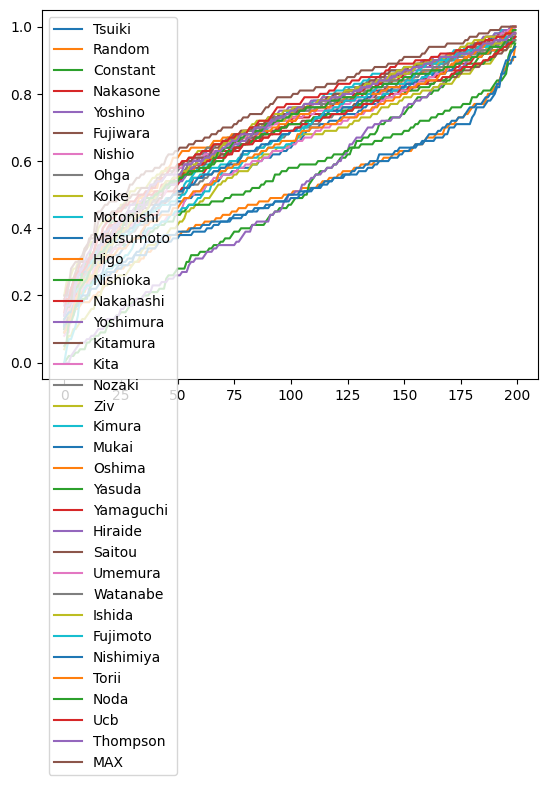

In [40]:
names =["Tsuiki", "Random","Constant","Nakasone","Yoshino",\
        "Fujiwara","Nishio","Ohga","Koike","Motonishi",\
        "Matsumoto","Higo","Nishioka","Nakahashi","Yoshimura",\
        "Kitamura","Kita","Nozaki","Ziv","Kimura", \
        "Mukai","Oshima","Yasuda","Yamaguchi","Hiraide",\
        "Saitou","Umemura","Watanabe","Ishida","Fujimoto",\
        "Nishimiya","Torii","Noda",\
        "Ucb","Thompson"]
numplay=200
ret = MultiMABTester(numplay, \
[TsuikiStrategy_A,RandomStrategy_A,ConstantStrategy_A,NakasoneStrategy_A,YoshinoStrategy_A,\
 FujiwaraStrategy_A,NishioStrategy_A,OhgaStrategy_A,KoikeStrategy_A,MotonishiStrategy_A,\
 MatsumotoStrategy_A,HigoStrategy_A,NishiokaStrategy_A,NakahashiStrategy_A,YoshimuraStrategy_A,\
 KitamuraStrategy_A,KitaStrategy_A,NozakiStrategy_A,ZivStrategy_A,KimuraStrategy_A, \
 MukaiStrategy_A,OshimaStrategy_A,YasudaStrategy_A,YamaguchiStrategy_A,HiraideStrategy_A,\
 SaitouStrategy_A,UmemuraStrategy_A,WatanabeStrategy_A,IshidaStrategy_A,FujimotoStrategy_A,\
 NishimiyaStrategy_A,ToriiStrategy_A,NodaStrategy_A,\
 UcbStrategy_A,ThompsonStrategy_A])
ret.sort(axis=1)
#print(ret)
names.append("MAX")  # Tester は，最後に max の値を追加する
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
for i in range(len(names)):
    ax1.plot(ret[i], label=names[i])
ax1.legend(loc='upper left')
sorted(zip(map(lambda x: sum(x)/numplay,ret), names), reverse=True)

[(0.7522869999999953, 'MAX'),
 (0.7126349999999895, 'Ucb'),
 (0.7082809999999977, 'Saitou'),
 (0.7061620000000004, 'Higo'),
 (0.706030999999997, 'Ohga'),
 (0.7031469999999986, 'Thompson'),
 (0.7026549999999988, 'Ziv'),
 (0.7018190000000001, 'Yoshimura'),
 (0.7008139999999928, 'Fujiwara'),
 (0.6983999999999879, 'Hiraide'),
 (0.6968989999999868, 'Ishida'),
 (0.6908739999999831, 'Motonishi'),
 (0.6839700000000003, 'Nishio'),
 (0.6792739999999935, 'Oshima'),
 (0.6790979999999972, 'Noda'),
 (0.6785349999999924, 'Kita'),
 (0.6773229999999965, 'Watanabe'),
 (0.6741159999999904, 'Nakahashi'),
 (0.6676669999999977, 'Nakasone'),
 (0.666061999999998, 'Yamaguchi'),
 (0.6607660000000013, 'Kitamura'),
 (0.6606829999999981, 'Yasuda'),
 (0.6602209999999853, 'Kimura'),
 (0.6580159999999964, 'Fujimoto'),
 (0.6571389999999943, 'Mukai'),
 (0.6546799999999781, 'Nozaki'),
 (0.6366999999999784, 'Umemura'),
 (0.6353579999999742, 'Tsuiki'),
 (0.6330249999999777, 'Torii'),
 (0.5966669999999955, 'Koike'),
 (0.55

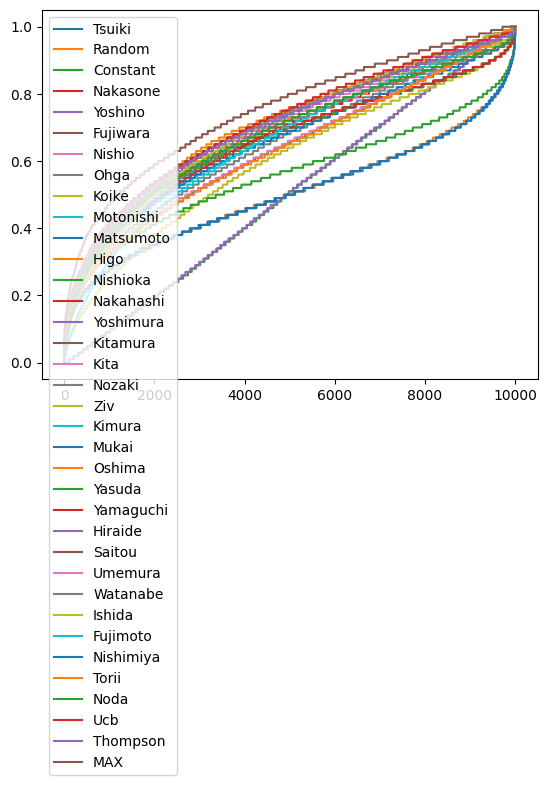

In [43]:
names =["Tsuiki", "Random","Constant","Nakasone","Yoshino",\
        "Fujiwara","Nishio","Ohga","Koike","Motonishi",\
        "Matsumoto","Higo","Nishioka","Nakahashi","Yoshimura",\
        "Kitamura","Kita","Nozaki","Ziv","Kimura", \
        "Mukai","Oshima","Yasuda","Yamaguchi","Hiraide",\
        "Saitou","Umemura","Watanabe","Ishida","Fujimoto",\
        "Nishimiya","Torii","Noda",\
        "Ucb","Thompson"]
numplay=10000
ret = MultiMABTester(numplay, \
[TsuikiStrategy_A,RandomStrategy_A,ConstantStrategy_A,NakasoneStrategy_A,YoshinoStrategy_A,\
 FujiwaraStrategy_A,NishioStrategy_A,OhgaStrategy_A,KoikeStrategy_A,MotonishiStrategy_A,\
 MatsumotoStrategy_A,HigoStrategy_A,NishiokaStrategy_A,NakahashiStrategy_A,YoshimuraStrategy_A,\
 KitamuraStrategy_A,KitaStrategy_A,NozakiStrategy_A,ZivStrategy_A,KimuraStrategy_A, \
 MukaiStrategy_A,OshimaStrategy_A,YasudaStrategy_A,YamaguchiStrategy_A,HiraideStrategy_A,\
 SaitouStrategy_A,UmemuraStrategy_A,WatanabeStrategy_A,IshidaStrategy_A,FujimotoStrategy_A,\
 NishimiyaStrategy_A,ToriiStrategy_A,NodaStrategy_A,\
 UcbStrategy_A,ThompsonStrategy_A])
ret.sort(axis=1)
#print(ret)
names.append("MAX")  # Tester は，最後に max の値を追加する
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
for i in range(len(names)):
    ax1.plot(ret[i], label=names[i])
ax1.legend(loc='upper left')
sorted(zip(map(lambda x: sum(x)/numplay,ret), names), reverse=True)